In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
A = pd.read_csv('/content/abhiu.csv')
A.replace(',', '.', regex=True, inplace=True)
A.head()
A.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1,0,0,0,0,6,0,1,1600,2.1,2.4,3.5,3.6,1.7,0
1,1,1,0,0,1,0,2,0,3,592,0.3,0.3,0,0.1,0.2,0
2,2,2,4,3,9,0,16,1,8,1110,8,5,5,7,5,1
3,3,5,1,3,9,2,11,0,8,8651,6,5,4,6,4,1
4,4,14,6,15,28,0,50,0,45,34172,8.7,9,6.5,10,8.8,1


In [4]:
A.shape


(71, 16)

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          71 non-null     int64 
 1   total_posts         71 non-null     int64 
 2   helpful_post        71 non-null     int64 
 3   nice_code_post      71 non-null     int64 
 4   collaborative_post  71 non-null     int64 
 5   confused_post       71 non-null     int64 
 6   creative_post       71 non-null     int64 
 7   bad_post            71 non-null     int64 
 8   amazing_post        71 non-null     int64 
 9   timeonline          71 non-null     int64 
 10  sk1_classroom       71 non-null     object
 11  sk2_classroom       71 non-null     object
 12  sk5_classroom       71 non-null     object
 13  sk3_classroom       71 non-null     object
 14  sk4_classroom       71 non-null     object
 15  Approved            71 non-null     int64 
dtypes: int64(11), object(5)
memo

In [7]:
A.corr()['Approved'].sort_values()

Unnamed: 0           -0.198772
bad_post              0.128024
confused_post         0.265566
helpful_post          0.325159
nice_code_post        0.351249
amazing_post          0.434987
total_posts           0.439544
creative_post         0.442885
collaborative_post    0.466496
timeonline            0.568298
Approved              1.000000
Name: Approved, dtype: float64

In [8]:
A.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1,0,0,0,0,6,0,1,1600,"2,1","2,4","3,5","3,6","1,7",0
1,1,1,0,0,1,0,2,0,3,592,"0,3","0,3",0,"0,1","0,2",0
2,2,2,4,3,9,0,16,1,8,1110,8,5,5,7,5,1
3,3,5,1,3,9,2,11,0,8,8651,6,5,4,6,4,1
4,4,14,6,15,28,0,50,0,45,34172,"8,7",9,"6,5",10,"8,8",1


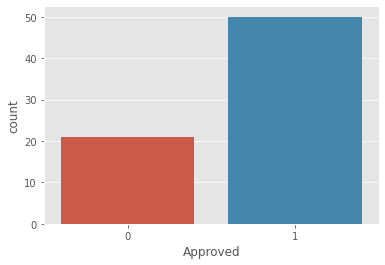

In [9]:
style.use('ggplot')
sns.countplot(A['Approved'])

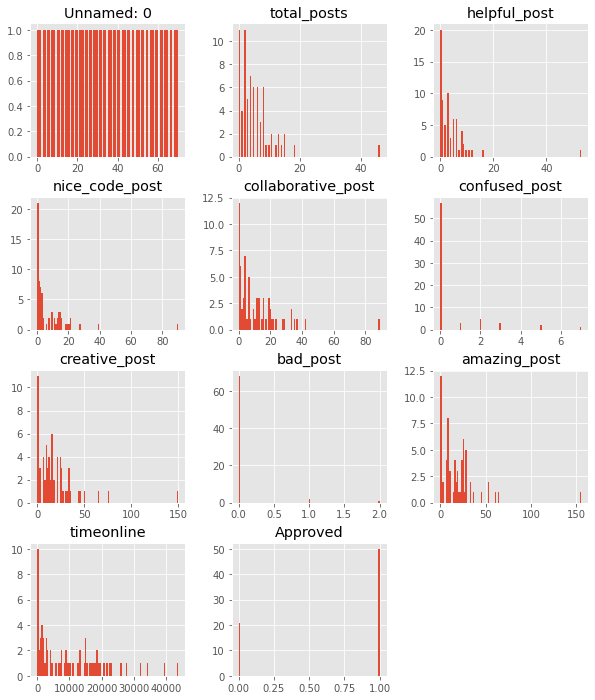

In [10]:
A.hist(bins=100, figsize=(10,12))
plt.show()

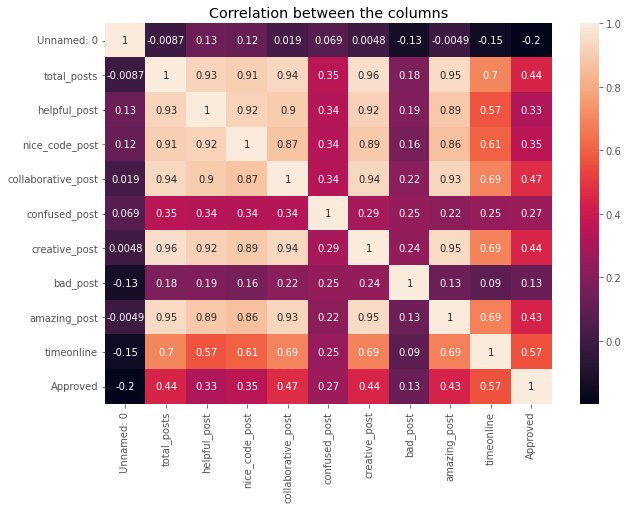

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(A.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [12]:
A.corr()['Approved'].sort_values()

Unnamed: 0           -0.198772
bad_post              0.128024
confused_post         0.265566
helpful_post          0.325159
nice_code_post        0.351249
amazing_post          0.434987
total_posts           0.439544
creative_post         0.442885
collaborative_post    0.466496
timeonline            0.568298
Approved              1.000000
Name: Approved, dtype: float64

In [17]:
from sklearn import preprocessing

y = A['Approved'].values

X = A[['total_posts', 'helpful_post', 'nice_code_post', 'collaborative_post', 'confused_post','creative_post','bad_post','amazing_post','timeonline']].values
X = preprocessing.StandardScaler().fit(X).transform(X)


In [19]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (56, 9) (56,)
Test set: (15, 9) (15,)


In [20]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)
xgboost_yhat = xgb_model.predict(X_test)

[16:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,xgboost_yhat.round()))
print(classification_report(y_test,xgboost_yhat.round()))
print(accuracy_score(y_test, xgboost_yhat.round()))

[[ 2  0]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.85      0.92        13

    accuracy                           0.87        15
   macro avg       0.75      0.92      0.79        15
weighted avg       0.93      0.87      0.88        15

0.8666666666666667
